<a href="https://colab.research.google.com/github/mar-iiam/selected-2/blob/main/selected_2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hey ")

hey 


In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariiamamrr","key":"ccc399b1e116361afbe2a1b3df0f4152"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                 title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023               Data Science Salaries 2023 💸                 25KB  2023-04-13 09:55:16           7846        204  1.0              
salvatorerastelli/spotify-and-youtube               Spotify and Youtube                           9MB  2023-03-20 15:43:25          12529        419  1.0              
iammustafatz/diabetes-prediction-dataset            Diabetes prediction dataset                 734KB  2023-04-08 06:11:45           4136         63  1.0              
shawkyelgendy/furniture-price-prediction            Furniture Price Prediction                   81KB  2023-04-17 09:35:17           1179         28  1.0       

In [8]:
! kaggle datasets download -d vaibhao/handwritten-characters

 99% 1.61G/1.62G [00:18<00:00, 152MB/s]
100% 1.62G/1.62G [00:18<00:00, 93.8MB/s]


In [9]:
! kaggle datasets download -d landlord/handwriting-recognition

 99% 1.25G/1.26G [00:15<00:00, 128MB/s]
100% 1.26G/1.26G [00:15<00:00, 87.7MB/s]


In [10]:
! unzip handwritten-characters.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Validation/F/167.jpg  
  inflating: dataset/Validation/F/168.jpg  
  inflating: dataset/Validation/F/169.jpg  
  inflating: dataset/Validation/F/17.jpg  
  inflating: dataset/Validation/F/170.jpg  
  inflating: dataset/Validation/F/171.jpg  
  inflating: dataset/Validation/F/172.jpg  
  inflating: dataset/Validation/F/173.jpg  
  inflating: dataset/Validation/F/174.jpg  
  inflating: dataset/Validation/F/175.jpg  
  inflating: dataset/Validation/F/176.jpg  
  inflating: dataset/Validation/F/177.jpg  
  inflating: dataset/Validation/F/178.jpg  
  inflating: dataset/Validation/F/179.jpg  
  inflating: dataset/Validation/F/18.jpg  
  inflating: dataset/Validation/F/180.jpg  
  inflating: dataset/Validation/F/181.jpg  
  inflating: dataset/Validation/F/182.jpg  
  inflating: dataset/Validation/F/183.jpg  
  inflating: dataset/Validation/F/184.jpg  
  inflating: dataset/Validation/F/185.jpg  
  inflating: dataset/Valida

In [11]:
! unzip handwriting-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: validation_v2/validation/VALIDATION_5003.jpg  
  inflating: validation_v2/validation/VALIDATION_5004.jpg  
  inflating: validation_v2/validation/VALIDATION_5005.jpg  
  inflating: validation_v2/validation/VALIDATION_5006.jpg  
  inflating: validation_v2/validation/VALIDATION_5007.jpg  
  inflating: validation_v2/validation/VALIDATION_5008.jpg  
  inflating: validation_v2/validation/VALIDATION_5009.jpg  
  inflating: validation_v2/validation/VALIDATION_5010.jpg  
  inflating: validation_v2/validation/VALIDATION_5011.jpg  
  inflating: validation_v2/validation/VALIDATION_5012.jpg  
  inflating: validation_v2/validation/VALIDATION_5013.jpg  
  inflating: validation_v2/validation/VALIDATION_5014.jpg  
  inflating: validation_v2/validation/VALIDATION_5015.jpg  
  inflating: validation_v2/validation/VALIDATION_5016.jpg  
  inflating: validation_v2/validation/VALIDATION_5017.jpg  
  inflating: validation_v2/validation/VALIDATION_

In [12]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [62]:
dir = "/content/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@","0","1","2","3","4","5","6","7","8","9"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 6000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [63]:
len(train_data)

142718

In [65]:
val_dir = "/content/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1500:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [66]:
len(val_data)

6651

In [67]:
random.shuffle(train_data)
random.shuffle(val_data)

In [68]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [69]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [70]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [71]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [72]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [73]:
print(train_X.shape,val_X.shape)

(142718, 32, 32, 1) (6651, 32, 32, 1)


In [74]:
print(train_Y.shape,val_Y.shape)

(142718, 25) (6651, 25)


In [103]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='softmax'))

In [105]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 128)       

In [106]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [107]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4460/4460 [==============================] - 27s 5ms/step - loss: 0.4516 - accuracy: 0.8573 - val_loss: 0.2649 - val_accuracy: 0.9093
Epoch 2/50
4460/4460 [==============================] - 24s 5ms/step - loss: 0.2402 - accuracy: 0.9212 - val_loss: 0.2460 - val_accuracy: 0.9154
Epoch 3/50
4460/4460 [==============================] - 26s 6ms/step - loss: 0.2073 - accuracy: 0.9305 - val_loss: 0.2308 - val_accuracy: 0.9233
Epoch 4/50
4460/4460 [==============================] - 24s 5ms/step - loss: 0.1888 - accuracy: 0.9364 - val_loss: 0.1924 - val_accuracy: 0.9378
Epoch 5/50
4460/4460 [==============================] - 25s 6ms/step - loss: 0.1756 - accuracy: 0.9402 - val_loss: 0.1905 - val_accuracy: 0.9334
Epoch 6/50
4460/4460 [==============================] - 26s 6ms/step - loss: 0.1676 - accuracy: 0.9425 - val_loss: 0.1691 - val_accuracy: 0.9408
Epoch 7/50
4460/4460 [==============================] - 24s 5ms/step - loss: 0.1588 - accuracy: 0.9442 - val_loss: 0.1742 - val_ac

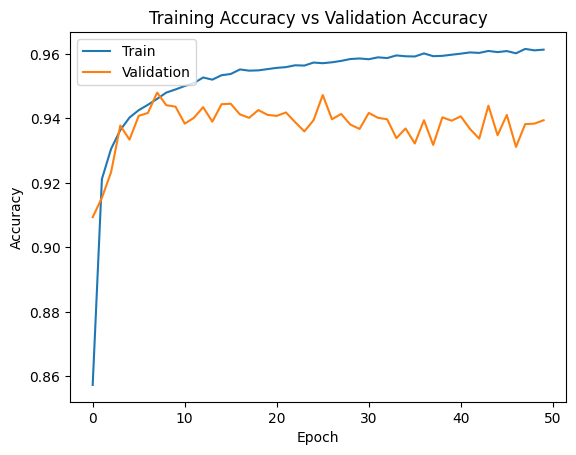

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

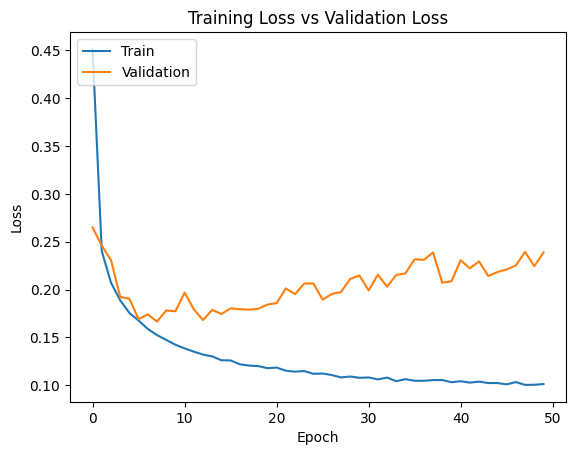

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [110]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [111]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [112]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 19ms/step
LILUU


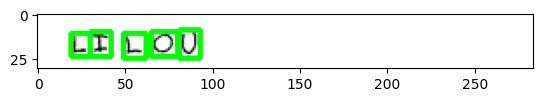

In [113]:
letter,image = get_letters("/content/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 21ms/step
VALENTINF


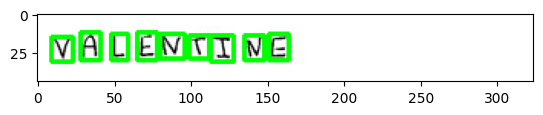

In [114]:
letter,image = get_letters("/content/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 24ms/step
BEWES


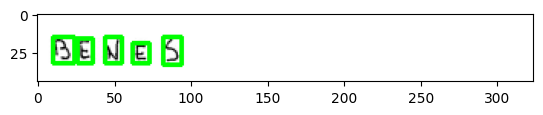

In [115]:
letter,image = get_letters("/content/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 28ms/step
JAFFFUX


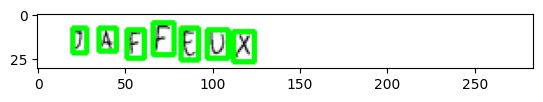

In [116]:
letter,image = get_letters("/content/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)